In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
# from sklearn.model_selection import train_test_split
# from sklearn.impute import KNNImputer
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from sklearn import feature_selection
# from sklearn import model_selection
# from sklearn import metrics

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [7]:
#find null value
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.shape

(891, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
label = 'Survived'
cat_var = ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']
num_var = ['Age', 'Fare']

In [12]:
#Count value in each categorical var
for var in cat_var:
    print(' Value counts for variable ' + var)
    print(df[var].value_counts(sort = False))
    print('-----')

 Value counts for variable Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64
-----
 Value counts for variable Sex
male      577
female    314
Name: Sex, dtype: int64
-----
 Value counts for variable Embarked
Q     77
S    644
C    168
Name: Embarked, dtype: int64
-----
 Value counts for variable SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64
-----
 Value counts for variable Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64
-----


In [14]:
#survived proportion in each categorical var
# for var in cat_var:
#     print(df[[var,'Survived']].groupby([var]).mean())
#     print('------')


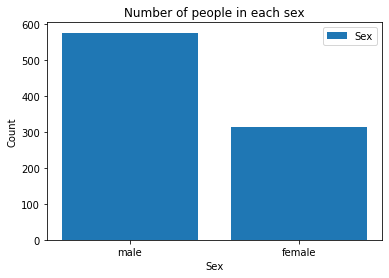

In [15]:
#Plot number of value in each categorical var
# fig, ax = plt.subplots()
# ax.bar(df['Sex'].value_counts().index, df['Sex'].value_counts().values, label = 'Sex')
# ax.set_xlabel('Sex')
# ax.set_ylabel('Count')
# ax.legend()
# ax.set_title('Number of people in each sex')
# plt.show()

[]

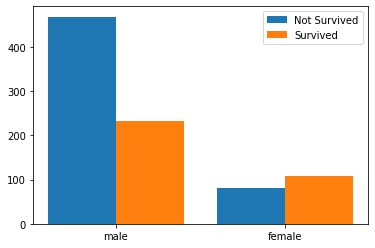

In [40]:
# Plot sex vs Survived
fig, ax = plt.subplots()

x = np.arange(len(df['Sex'].unique()))
bar_width = 0.4

ax.bar(x, df[df['Survived'] == 0]['Sex'].value_counts().values,width=bar_width, label = 'Not Survived')
ax.bar(x +bar_width, df[df['Survived'] == 1]['Sex'].value_counts().values,width=bar_width, label = 'Survived')
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(df['Sex'].unique())
ax.legend()

plt.plot()

In [49]:
# def plot_cat_var_survived(var, df):
#     fig, ax = plt.subplots()

#     x = np.arange(len(df[var].unique()))
#     bar_width = 0.4

#     ax.bar(x, df[df['Survived'] == 0][var].value_counts().values,width=bar_width, label = 'Not Survived')
#     ax.bar(x +bar_width, df[df['Survived'] == 1][var].value_counts().values,width=bar_width, label = 'Survived')
#     ax.set_xticks(x + bar_width / 2)
#     ax.set_xticklabels(df[var].unique())
#     ax.legend()
#     ax.set_title(var)

#     plt.plot()

# for var in cat_var:
#     plot_cat_var_survived(var, temp_df)

In [16]:
# Describe numerical varue
df[num_var].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


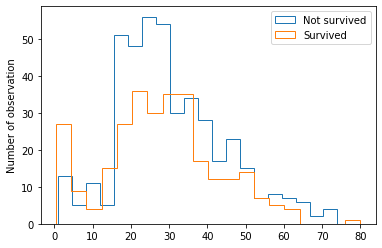

In [17]:
#drop na
#then plot Age vs Survived _histogram

temp_df = df.dropna(subset = ['Age'])
fig,ax = plt.subplots()
ax.hist(temp_df[temp_df['Survived']==0]['Age'], label = 'Not survived', bins = 20, histtype = 'step')
ax.hist(temp_df[temp_df['Survived']==1]['Age'], label = 'Survived', bins = 20, histtype = 'step')
ax.set_ylabel('Number of observation')
ax.legend()
plt.show()

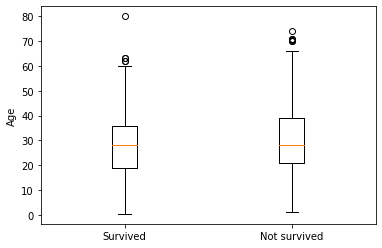

In [18]:
#then plot Age vs Survived _boxplot

fig,ax = plt.subplots()
ax.boxplot([temp_df[temp_df['Survived'] == 1]['Age'],temp_df[temp_df['Survived'] == 0]['Age']])
ax.set_xticklabels(['Survived', 'Not survived'])
ax.set_ylabel('Age')
plt.show()


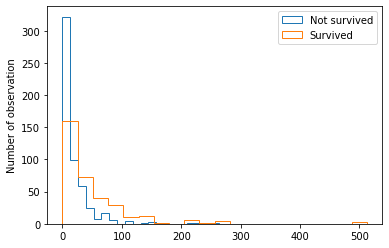

In [19]:
#drop na
#then plot Fare vs Survived_histogram

temp_df = df.dropna(subset = ['Fare'])
fig,ax = plt.subplots()
ax.hist(temp_df[temp_df['Survived']==0]['Fare'], label = 'Not survived', bins = 20, histtype = 'step')
ax.hist(temp_df[temp_df['Survived']==1]['Fare'], label = 'Survived', bins = 20, histtype = 'step')
ax.set_ylabel('Number of observation')
ax.legend()
plt.show()

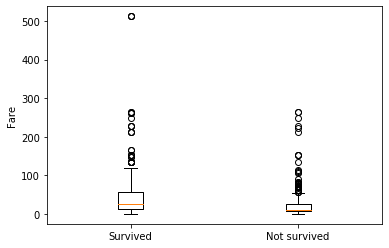

In [20]:
#plot Fare vs Survived_boxplot

fig,ax = plt.subplots()
ax.boxplot([temp_df[temp_df['Survived'] == 1]['Fare'],temp_df[temp_df['Survived'] == 0]['Fare']])
ax.set_xticklabels(['Survived', 'Not survived'])
ax.set_ylabel('Fare')
plt.show()

In [ ]:
# Clean df and df_test
# df = df.drop(['PassengerId','Cabin', 'Ticket'], axis = 1)
# df_test = df_test.drop(['PassengerId','Cabin', 'Ticket'], axis = 1)

# df['Family_size'] = df['SibSp'] + df['Parch'] + 1
# df_test['Family_size'] = df_test['SibSp'] + df_test['Parch'] + 1

# df = df.drop(['SibSp', 'Parch'], axis = 1)
# df_test = df_test.drop(['SibSp', 'Parch'], axis = 1)